In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Setting seed value 

np.random.seed(42)

### Reading the standard Advertising dataset

In [5]:
# Data set used in this exercise

data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)
df = pd.read_csv(data_filename)

#Selecting the predictor and response variables
x = df[['TV']]
y = df['sales']

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Train-Test split

In [49]:
# hint: test_train_split(x,y,train_size=)

In [6]:
#print (x[1])
# Split the dataset in training and testing with 60% training set and 40% testing set 

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6,random_state=66)

In [7]:
# Choosing k range 
k_value_min = 1
k_value_max = 70

# creating list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

### Model fit

In [8]:
# hint mean_squared_error

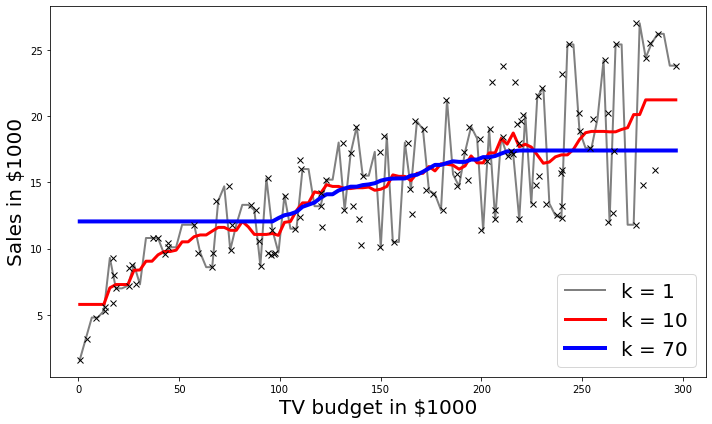

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

# creating a dictionary for storing k value against MSE fit {k: MSE@k} 

knn_dict = {}
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train,y_train)
    
    # predictions
    y_pred = model.predict(x_test)
    
    # Calculating MSE 
    MSE = mean_squared_error(y_test, y_pred)

    
    #Storing the MSE values of each k value in a dictionary
    knn_dict[k_value] = MSE
    
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

### Graph plot

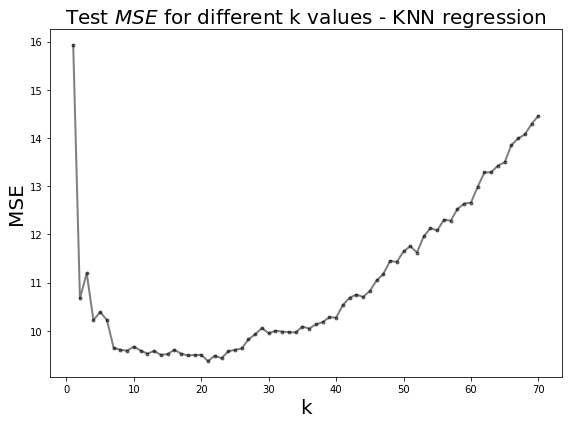

In [10]:
# Plot k against MSE

plt.figure(figsize=(8,6))
plt.plot(k_list, list(knn_dict.values()),'k.-',alpha=0.5,linewidth=2)

plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ for different k values - KNN regression',fontsize=20)
plt.tight_layout()

### Find the best knn model

In [11]:
# Looking for k with minimum MSE
min_mse = min(knn_dict.values())
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  [21] with a MSE of  9.3737052154195


In [56]:
best_model

[21]